# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [1]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

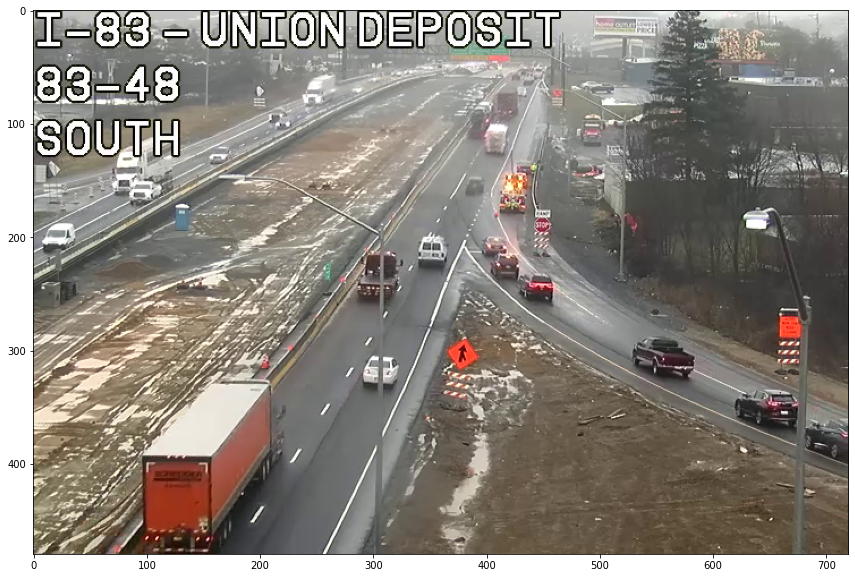

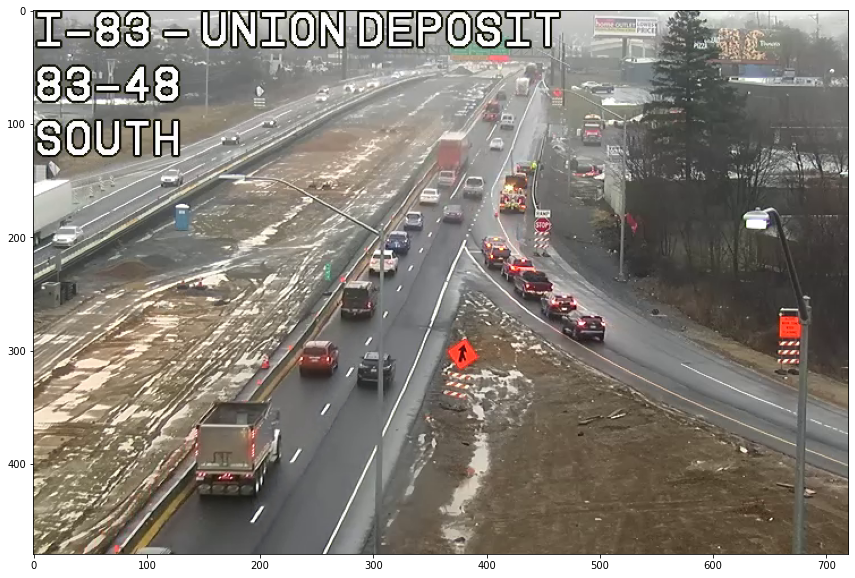

In [2]:
DATA_PATH = '../data/{}'.format(os.getcwd().split('/')[-1])
pathlib.Path(DATA_PATH).mkdir(parents=True, exist_ok=True)

VIDEO_FILE = '/data/MoveOver/Videos/PA/20210404/D8_83-48-2021-03-01 FHWA.mp4'

pickle.dump(VIDEO_FILE, open(f'{DATA_PATH}/videopath.p', 'wb'))

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 10, dest_file = './images/frame_view1.jpg');
extractFrame(VIDEO_FILE, frameno = 15*10, dest_file = './images/frame_view2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [ ]:
SRC = np.float32([
        [999, 662], # Upper left, asphalt change
        [1150, 659], # Upper right, asphalt change
        [1451, 993], # Bottom right - triangle top 
        [1222, 1001], # Bottom left - dashed line 
        [1378, 910],  #  right
        [1117, 843] #  left - fourth dashed line (first one is above)
    ])
DST = np.float32([
        [526, 435], # Upper left, asphalt change
        [579, 450], # Upper right, asphalt change
        [1036, 766], # Bottom right - triangle top 
        [988, 752], # Bottom left - dashed line   
        [953, 709], #  right
        [820, 636] #  left - fourth dashed line
])



print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



In [ ]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

In [ ]:
map_file = './images/SkyView.jpg'
ret = displayPoints(SRC, M, './images/frame_view2.jpg', map_file)

In [ ]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_view1.jpg')

# Lane masks

In [ ]:
MASK_PATH = './images/mask.png'

In [ ]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

### Processing mask
Tamper with this code and run it, if something is wrong with the mask

In [ ]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

In [ ]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)